<a href="https://colab.research.google.com/github/mannirulz/DeepDAD/blob/master/ML/DeepDAD_Scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Modules and dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score 


from imblearn.over_sampling import SMOTE 

sns.set_style("ticks")
plt.style.use("seaborn-poster")

%matplotlib inline
#Load Dataset
#df = pd.read_csv("export.csv",low_memory=False)

df = pd.read_csv("Export_MultiAnomaly.csv",low_memory=False)
print("There are %s observations and %s columns in the dataset" % df.shape)
#print(df.head())

There are 252741 observations and 17 columns in the dataset


# Encode Output Labls

In [0]:
#Set plotting Configuration
sns.set_style("ticks")
plt.style.use("seaborn-poster")
%matplotlib inline

#Load Dataset
#df = pd.read_csv("export.csv",low_memory=False)
df = pd.read_csv("Export_MultiAnomaly.csv",low_memory=False)

print("There are %s observations and %s columns in the dataset" % df.shape)
print(df.head())

# encode target labels
y =df.Result.str.strip()
  #print(y[:5])
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
df.Result.unique()
x = df[df.columns.difference(['Result'])].values
  #x = df['Result'].values

print("Shape of X: ", x.shape)
print("Shape of y: ", y.shape)
print(x,y)


sm = SMOTE(random_state=42)


x_bal, y_bal = sm.fit_sample(x, y)


#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.2, random_state = 5)

#print("Shape of data: ", x_train.shape)
#print("Shape of labels: ", y_train.shape)
#print(x_train,y_train)

print(x_train, y_train)

#for i in range(len(y_train)):
  #print(y_train[i])
#plt.scatter(y_train,y_train)

There are 252741 observations and 17 columns in the dataset
    P1   P2  P3  P4   P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  P15 Result  \
0  114   92   2  57   45   0   0   1   7   52    1    0   16    5    0  Clean   
1  111   58  48  37   45   0   0   1   6   26    1    0    0    0    0  Clean   
2  196  186   3  98  106   0   0   1  10  108    1    0    0    0    0  Clean   
3  190   99   7  63  110   0   0   1   6   60    1    0    0    0    0  Clean   
4  114  106   3  38   51   0   0   1   9   59    1    0    0    0    0  Clean   

   ResCode  
0        0  
1        0  
2        0  
3        0  
4        0  
Shape of X:  (252741, 16)
Shape of y:  (252741,)
[[114  52   1 ...   1   7   0]
 [111  26   1 ...   1   6   0]
 [196 108   1 ...   1  10   0]
 ...
 [182  20   4 ...   1   4   0]
 [159  32   1 ...   1   2   0]
 [168  14   3 ...   1   3   0]] [1 1 1 ... 1 1 1]
[[1347  888    1 ...    1   46 3133]
 [1339  106    1 ...    1   22 2176]
 [ 154   33    2 ...    1    4    0]
 ...


#Plot Confusion matrix FUnction

In [0]:
# Bot : 607692
# Clean :  1044

# source: Scikit-learn Documentation

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

# Neural Network Classifier

0.9998809228479285
[[50317     0]
 [   12 50446]]
Confusion matrix, without normalization
[[50317     0]
 [   12 50446]]
Sensitivity:  0.9997621784454398
Specificity:  1.0
Accuracy:  0.9998809228479285
Accuracy:  0.9998809228479285
50317 0 12 50446


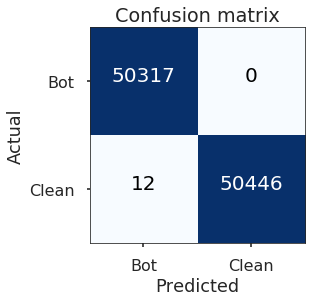

In [0]:
# Neural Network Classifier

from sklearn.neural_network import MLPClassifier


#nn_classifier = MLPClassifier(solver='lbfgs',max_iter=5, alpha=1e-5,hidden_layer_sizes=(10,6,4,3,2), random_state=1)
nn_classifier = MLPClassifier(solver='adam',max_iter=100, alpha=1e-5,hidden_layer_sizes=(10,10,2), random_state=1,activation='relu')

#nn_classifier.fit(x_train, y_train) 


from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train = scaler.transform(x_train)  
# apply same transformation to test data
x_test = scaler.transform(x_test)  



nn_classifier.fit(x_train, y_train)
y_pred = nn_classifier.predict(x_test)

print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)


plot_confusion_matrix(cm, labelencoder_y.classes_)

TN, FP, FN, TP = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()

print("Sensitivity: ", TP/(TP+FN))
print("Specificity: ", TN/(TN+FP))

correct_predictions = TN+TP
total_predictions = TN+FN+TP+FP
accuracy = correct_predictions/total_predictions
print("Accuracy: ", accuracy)

from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(TN, FP, FN, TP )





Confusion matrix, without normalization
[[50317     0]
 [   12 50446]]


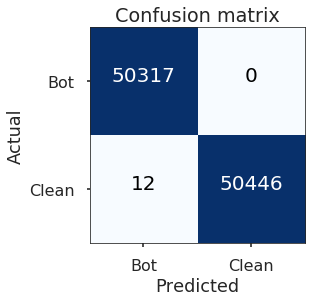

In [0]:
# Predicted Model

y_pred  = nn_classifier.predict(x_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(cm, labelencoder_y.classes_)




In [0]:
TN, FP, FN, TP = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()

print("Sensitivity: ", TP/(TP+FN))
print("Specificity: ", TN/(TN+FP))

correct_predictions = TN+TP
total_predictions = TN+FN+TP+FP
accuracy = correct_predictions/total_predictions
print("Accuracy: ", accuracy)

from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(TN, FP, FN, TP )


Sensitivity:  0.9997621784454398
Specificity:  1.0
Accuracy:  0.9998809228479285
Accuracy:  0.9998809228479285
50317 0 12 50446


In [0]:
def plot_results(model, param = 'max_depth', name = 'Num Trees',ymin=0.90 , ymax = 1.0,tmin=0,tmax =200):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(15, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    #plt.ylim(ymin = 0.96, ymax = 1.0)
    #plt.ylim(ymin = 0.990, ymax = 1.0)
    plt.ylim(ymin = ymin, ymax = ymax)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = tmin, ymax =  tmax)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)

# Grid Search Neural Network


In [0]:
parameters = {'solver': ['lbfgs'], 'max_iter': [5,10], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(2, 4), 'activation' : ['identity', 'logistic', 'tanh', 'relu'],'random_state':[0,1]}
clf_grid = GridSearchCV(nn_classifier, parameters, n_jobs=-1)

parameters = {'solver': ['lbfgs'], 'max_iter': [5,10,15], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(2, 4), 'random_state':[0,1]}
clf_grid_hair_soul = GridSearchCV(nn_classifier, parameters, n_jobs=-1)

In [0]:
clf_grid.fit(x,y.ravel())
#clf_grid_hair_soul.fit(x_hair_soul,y.ravel())

print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)
#print("-----------------Added hair_soul feature--------------")
#print("Best score: %0.4f" % clf_grid_hair_soul.best_score_)
#print("Using the following parameters:")
#print(clf_grid.best_params_)
#print("------------------------------------------------------")

#https://www.kaggle.com/hhllcks/neural-net-with-gridsearch
#Continue
#http://scikit-neuralnetwork.readthedocs.io/en/latest/guide_sklearn.html

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-----------------Original Features--------------------
Best score: 0.9979
Using the following parameters:
{'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': 2, 'max_iter': 5, 'random_state': 1, 'solver': 'lbfgs'}


# Varying Activation function

In [0]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


# Define a grid over only the maximum number of features
feature_grid = {'activation': ['identity', 'logistic', 'relu', 'tanh']}
#feature_grid = {'max_features': list(range(1, 15))}

# Create the grid search and fit on the training data
feature_grid_search = GridSearchCV(nn_classifier, param_grid=feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                  scoring = 'accuracy',return_train_score=True)


#feature_grid_search = GridSearchCV(nn_classifier, param_grid=feature_grid, cv = 3, n_jobs=-1, verbose= 2,
#                                  scoring = scoring,return_train_score=True , refit='AUC')



feature_grid_search.fit(x_train, y_train);

#print(feature_grid_search.cv_results_)


#plot_results(feature_grid_search, param='activation', name = 'Activators')

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.1min finished


{'mean_fit_time': array([42.0978446 , 42.82123462, 34.75978931, 35.99159026]), 'std_fit_time': array([10.35043361,  0.31423748,  0.27184241,  7.40660782]), 'mean_score_time': array([0.09588949, 0.18508188, 0.10685714, 0.22941319]), 'std_score_time': array([0.01820528, 0.0104329 , 0.02296457, 0.04202558]), 'param_activation': masked_array(data=['identity', 'logistic', 'relu', 'tanh'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'activation': 'identity'}, {'activation': 'logistic'}, {'activation': 'relu'}, {'activation': 'tanh'}], 'split0_test_score': array([0.99959067, 0.99984371, 0.99984371, 0.9998586 ]), 'split1_test_score': array([0.99968742, 0.9998586 , 0.9998586 , 0.99989581]), 'split2_test_score': array([0.99944182, 0.99973207, 0.99977673, 0.99978417]), 'mean_test_score': array([0.99957331, 0.99981146, 0.99982635, 0.99984619]), 'std_test_score': array([1.01016691e-04, 5.64630492e-05, 3.56071774e-05, 4.64122572e-05])

In [0]:
print(max(feature_grid_search.cv_results_['mean_test_Accuracy']))

KeyError: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


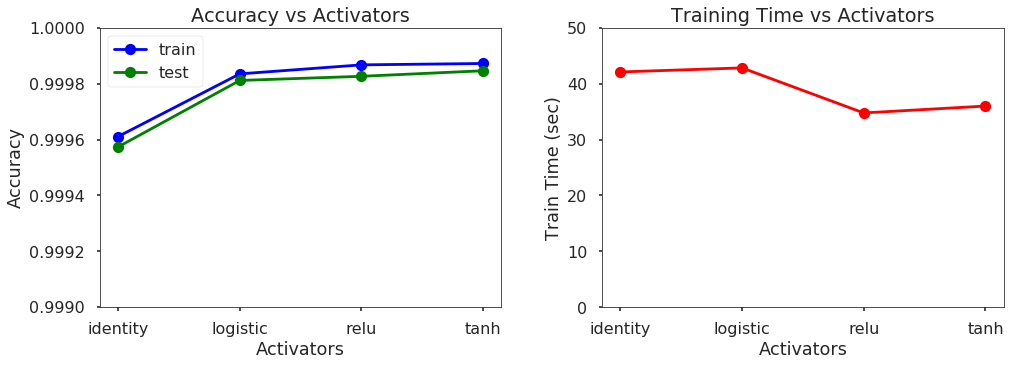

In [0]:
plot_results(feature_grid_search, param='activation', name = 'Activators',ymin=0.999,ymax=1,tmin=0,tmax=50)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.8min finished
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py

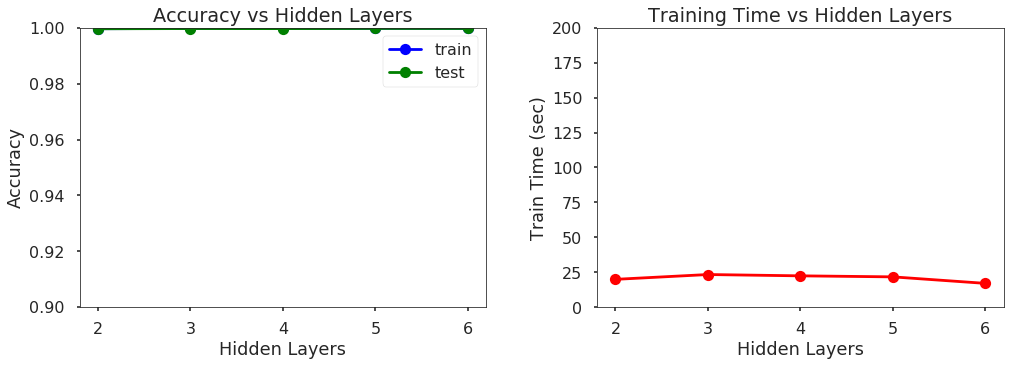

In [0]:
# Define a grid over only the maximum number of features
feature_grid = {'hidden_layer_sizes':np.arange(2, 7)}
#feature_grid = {'max_features': list(range(1, 15))}

# Create the grid search and fit on the training data
feature_grid_search = GridSearchCV(nn_classifier, param_grid=feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                  scoring = 'accuracy',return_train_score=True)
feature_grid_search.fit(x_train, y_train);


#plot_results(feature_grid_search, param='hidden_layer_sizes', name = 'Hidden Layers')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


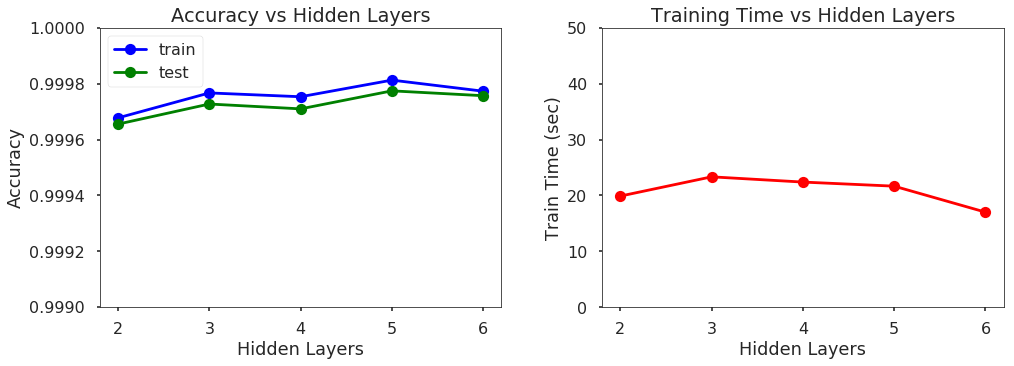

In [0]:
plot_results(feature_grid_search, param='hidden_layer_sizes', name = 'Hidden Layers',ymin=0.999,ymax=1,tmin=0,tmax=50)

In [0]:
# Define a grid over only the maximum number of features
feature_grid = {'max_iter': [5,10,50,100,200,500,1000]}
#feature_grid = {'max_features': list(range(1, 15))}

# Create the grid search and fit on the training data
feature_grid_search = GridSearchCV(nn_classifier, param_grid=feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                  scoring = 'accuracy',return_train_score=True)
feature_grid_search.fit(x_train, y_train);


#plot_results(feature_grid_search, param='max_iter', name = 'Maximum Iterations')

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  21 out of  21

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


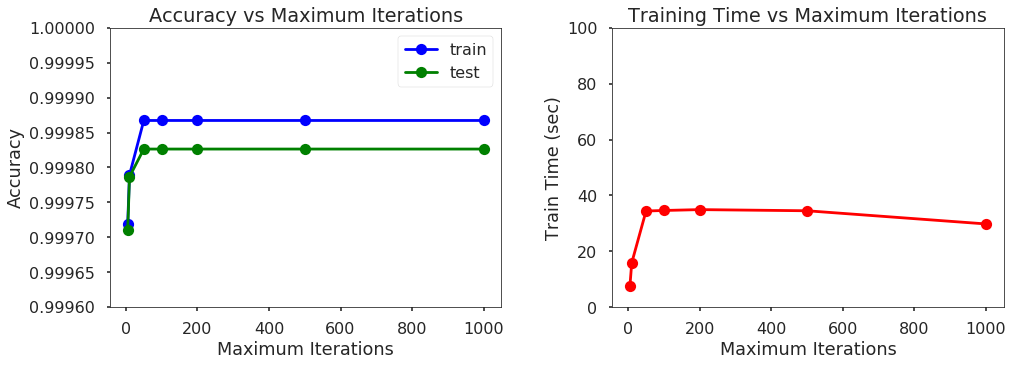

In [0]:
plot_results(feature_grid_search, param='max_iter', name = 'Maximum Iterations',ymin=0.9996,ymax=1,tmin=0,tmax=100)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] alpha=0.1 .......................................................
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=  57.5s
[CV] ........................................ alpha=0.1, total=  57.4s
[CV] alpha=0.1 .......................................................
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=  58.1s
[CV] alpha=0.01 ......................................................
[CV] ........................................ alpha=0.1, total=  59.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=  58.1s
[CV] alpha=0.001 .....................................................
[CV] ....................................... alpha=0.01, total=  58.0s
[CV] alpha=0.001 

[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  8.7min finished


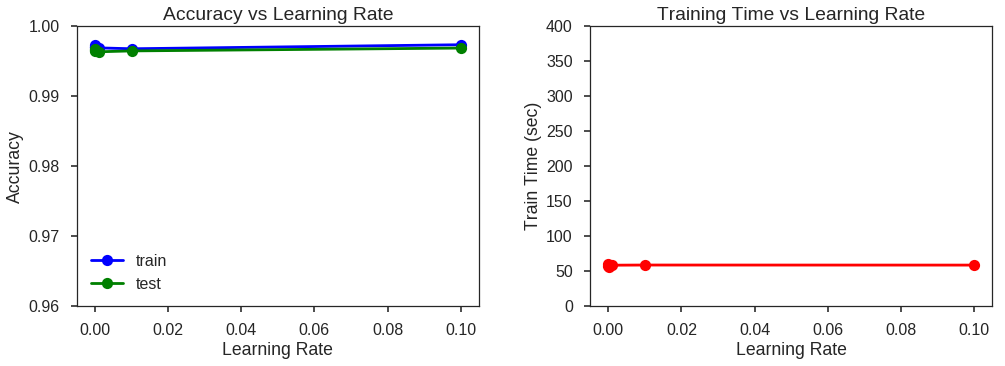

In [0]:
# Define a grid over only the maximum number of features
feature_grid = {'alpha': 10.0 ** -np.arange(1, 7)}
#feature_grid = {'max_features': list(range(1, 15))}

# Create the grid search and fit on the training data
#feature_grid_search = GridSearchCV(nn_classifier, param_grid=feature_grid, cv = 3, n_jobs=-1, verbose= 2,
#                                  scoring = 'accuracy',return_train_score=True)

feature_grid_search = GridSearchCV(nn_classifier, param_grid=feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                  scoring = ['accuracy', 'recall',],return_train_score=True)


feature_grid_search.fit(x_train, y_train);


plot_results(feature_grid_search, param='alpha', name = 'Learning Rate')